# Inteligencia Artificial.
Hacer programas que permitan a las computadoras hacer cosas que, cuando las hacen las personas, requieren inteligencia.

## Aprendizaje Automático.
Permite a las computadoras aprender sin ser programadas explícitamente.

### Redes Neuronales.
Las redes neuronales son un conjunto de algoritmos, modelados a partir de la estructura del cerebro humano, que permiten a las computadoras reconocer patrones.

#### Perceptron.

Los perceptrones son la forma más simple de red neuronal.
Son un tipo de red neuronal artificial que se utiliza para clasificar entradas según una función de activación.


<div style="text-align: center;">
    <img src="./Perceptrón.png" alt="Perceptrón" width="700"/>
</div>

La formula del perceptrón es:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$
donde:
- $x_i$ son las entradas.
- $w_i$ son los pesos.
- $b$ es el sesgo (bias).
- $f$ es la función de activación.
- $y$ es la salida del perceptrón.

La función de activación es la función escalón de Heaviside:

$$
f(x) = \left\{
\begin{array}{ll}
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{array}
\right.
$$

w=2.37, b=15.82


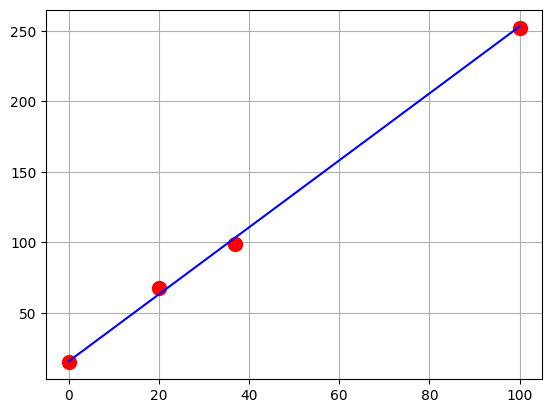

In [190]:
import matplotlib.pyplot as plt

def celcius_to_farenheit(c):
    return c * 9/5 + 32

# Experiencia 
X = [37, 0, 100, 20]
y = [98.6, 15.0, 252.0, 68.0] # Grados centigados a farenheit

def calculate(x, w, b):
    return x * w + b

def activacion(z):
    return z

# Elegir los pesos y bias iniciales (aleatorios)
w =  -5
b = 20

tasa_aprendizaje = 0.0001
for epocas in range(100000):

    for i in range(len(X)):
        x = X[i]
        yp  = activacion( calculate(x, w, b) )
        error = (y[i] - yp)
        w = w + tasa_aprendizaje * error * x
        b = b + tasa_aprendizaje * error 

print(f"{w=:.2f}, {b=:.2f}")
plt.plot(X, y, 'ro', markersize=10)

tc = list(range(0, 101, 10))
tf = [activacion(calculate(x, w, b)) for x in tc]
plt.plot(tc, tf, 'b-')
plt.grid()

w=[1.11 1.11], b=-1.11
[0 0] = 0
[0 1] = 0
[1 0] = 0
[1 1] = 1


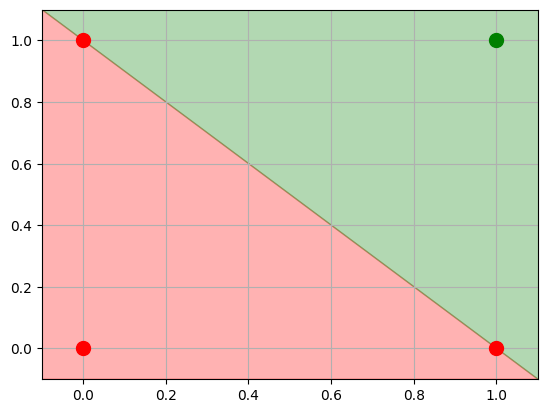

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# AND
#  x1  x2  y  or
#  0   0   0  0
#  0   1   0  1
#  1   0   0  1
#  1   1   1  1 

X = np.array([(0,0),(0,1),(1,0),(1,1)])
# Y = np.array([1, 0, 0, 0])   # NAND 
# Y = np.array([0, 1, 1, 1])   # AND 
Y = np.array([0, 0, 0, 1])   # OR 

def calculate(x, w, b): # x = (x1, x2) w = (w1, w2) b = bias
    z = np.dot(x, w) + b
    return z

def activacion(z):
    return 1 if z > 0 else 0

# Aprendizaje (encontrar valores para W y b)
w = np.array([2.0, 2.0])
b = 1
tasa_aprendizaje = 0.001

for epocas in range(10000):
    for x,y in zip(X, Y):
        # Predice el valor de y en funcion del valor x y los pesos w y b 
        yp = activacion(calculate(x, w, b))

        # Calcula el error
        error = -(yp - y)

        # Actualiza los pesos y el bias
        w = w + error * x * tasa_aprendizaje
        b = b + tasa_aprendizaje * error 


def f(x):
    return activacion(calculate(x, w, b))

print(f"w={w.round(2)}, {b=:.2f}")
for x in X :
    print(f"{x} = {f(x)}")

def mostrar_grafico(X, w, b, f):
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
    for x in X:
        plt.plot(x[0], x[1], 'ro' if f(x) == 0 else 'go', markersize=10)
    
    # Graficar la línea que se forma con los coeficientes descubiertos
    x_vals = np.linspace(-0.5, 1.5, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]

    plt.fill_between(x_vals, y_vals,y2=plt.ylim()[0], alpha=0.3, color='red')
    plt.fill_between(x_vals, y_vals, y2=plt.ylim()[1], color='green', alpha=0.3)

    plt.grid()
    
mostrar_grafico(X, w, b, f)

w=[1.11 1.11], b=-1.11
[0 0] = 0
[0 1] = 0
[1 0] = 0
[1 1] = 1


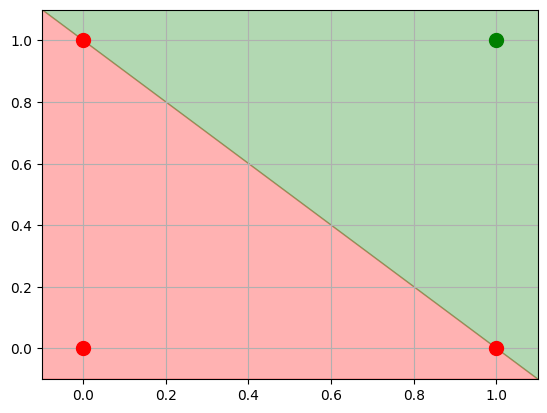

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# AND
#  x1  x2  y  or
#  0   0   0  0
#  0   1   0  1
#  1   0   0  1
#  1   1   1  1 

X = np.array([(0,0),(0,1),(1,0),(1,1)])
# Y = np.array([1, 0, 0, 0])   # NAND 
# Y = np.array([0, 1, 1, 1])   # AND 
Y = np.array([0, 0, 0, 1])   # OR 

def calculate(X, w, b): # X = (x1, x2) w = (w1, w2) b = bias
    z = np.dot(X, w) + b
    return z

def activacion(z):
    return np.where(z > 0, 1, 0)

# Aprendizaje (encontrar valores para W y b)
w = np.array([2.0, 2.0])
b = 1
tasa_aprendizaje = 0.001

for epocas in range(10000):
    # Predice el valor de y en funcion del valor X y los pesos w y b 
    yp = activacion(calculate(X, w, b))

    # Calcula el error
    error = Y - yp

    # Actualiza los pesos y el bias
    w += tasa_aprendizaje * np.dot(X.T, error)
    b += tasa_aprendizaje * error.sum()

def f(x):
    return activacion(calculate(x, w, b))

print(f"w={w.round(2)}, {b=:.2f}")
for x in X:
    print(f"{x} = {f(x)}")

mostrar_grafico(X, w, b, f)

In [241]:
class Perceptron:
    def __init__(self, tasa_aprendizaje=0.001, epocas=1000):
        self.tasa_aprendizaje = 0.001
        self.epocas = 1000

    def calculate(self, X):
        return np.dot(X, self.w) + self.b

    def activacion(self, z):
        return np.where(z > 0, 1, 0)

    def error(self, Y, Yp):
        return np.sum((Y - Yp)**2)
    
    def fit(self, X, Y):
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand(1)
        for epoca in range(self.epocas):
            # Predice el valor de y en funcion del valor X y los pesos w y b 
            yp = self.activacion(self.calculate(X))

            # Calcula el error
            error = Y - yp

            # Actualiza los pesos y el bias
            self.w += self.tasa_aprendizaje * np.dot(X.T, error)
            self.b += self.tasa_aprendizaje * error.sum()

    def predict(self, X):
        return self.activacion(self.calculate(X))[0]
    
    def __str__(self):
        return f"w:{self.w.round(3)}, b:{self.b[0].round(3)}"

p = Perceptron(.001, 10000)
p.fit(X, Y)
for x in X:
    print(f"{x} = {p.predict(x)}")

print(str(p))


[0 0] = 0
[0 1] = 0
[1 0] = 0
[1 1] = 1
w:[0.49  0.407], b:-0.49


In [242]:
import torch
import numpy as np

class Perceptron:
    def __init__(self, tasa_aprendizaje=0.001, epocas=1000):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.epocas = epocas

    def calculate(self, X):
        return torch.matmul(X, self.w) + self.b

    def activacion(self, z):
        return torch.where(z > 0, 1, 0)

    def error(self, Y, Yp):
        return torch.sum((Y - Yp)**2)
    
    def fit(self, X, Y):
        X = torch.tensor(X, dtype=torch.float32)
        Y = torch.tensor(Y, dtype=torch.float32)
        self.w = torch.rand(X.shape[1], dtype=torch.float32, requires_grad=True)
        self.b = torch.rand(1, dtype=torch.float32, requires_grad=True)
        optimizer = torch.optim.SGD([self.w, self.b], lr=self.tasa_aprendizaje)

        for epoca in range(self.epocas):
            optimizer.zero_grad()
            yp = self.activacion(self.calculate(X))
            loss = self.error(Y, yp)
            loss.backward()
            optimizer.step()

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        return self.activacion(self.calculate(X)).item()
    
    def __str__(self):
        return f"w:{self.w.detach().numpy().round(3)}, b:{self.b.item():.3f}"

# Datos de entrada
X = np.array([(0,0),(0,1),(1,0),(1,1)])
# Y = np.array([1, 0, 0, 0])   # NAND 
# Y = np.array([0, 1, 1, 1])   # AND 
Y = np.array([0, 0, 0, 1])   # OR 

# Entrenamiento del perceptrón
p = Perceptron(tasa_aprendizaje=0.001, epocas=10000)
p.fit(X, Y)

# Predicciones
for x in X:
    print(f"{x} = {p.predict(x)}")

print(str(p))

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 inputs, 1 output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Datos de entrada
X = np.array([(0,0),(0,1),(1,0),(1,1)], dtype=np.float32)
# Y = np.array([1, 0, 0, 0], dtype=np.float32)   # NAND 
# Y = np.array([0, 1, 1, 1], dtype=np.float32)   # AND 
Y = np.array([0, 0, 0, 1], dtype=np.float32)   # OR 

# Convertir a tensores de PyTorch
X_tensor = torch.tensor(X)
Y_tensor = torch.tensor(Y).view(-1, 1)

# Crear el modelo
model = Perceptron()

# Definir el criterio de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Entrenamiento del modelo
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)
    
    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Predicciones
with torch.no_grad():
    for x in X:
        x_tensor = torch.tensor(x, dtype=torch.float32)
        output = model(x_tensor)
        prediction = output.round().item()
        print(f"{x} = {prediction}")

# Imprimir los pesos y el sesgo
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")